## Error metrics in classification

### Binary Classification

Confusion Matrix: TP, TN, FP, FN
(3, 4, 1, 2)
Accuracy: 0.7
Precision: 0.75
Recall: 0.6
F1 Score: 0.6666666666666665
Specificity: 0.8
Cross Entropy Loss: 0.47704208432589856
MCC: 0.408248290463863


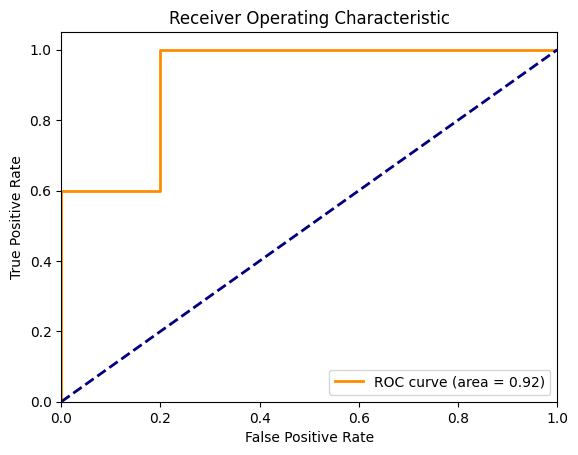

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, log_loss

# Function to calculate confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return (TP + TN) / (TP + TN + FP + FN)

# Function to calculate precision
def precision(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FP) if (TP + FP) > 0 else 0

# Function to calculate recall
def recall(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FN) if (TP + FN) > 0 else 0

# Function to calculate F1 score
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

# Function to calculate specificity
def specificity(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Function to calculate Matthews Correlation Coefficient (MCC)
def mcc(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    return numerator / denominator if denominator > 0 else 0

# Function to evaluate all metrics
def evaluate_metrics(y_true, y_pred, y_prob):
    print("Confusion Matrix: TP, TN, FP, FN")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy(y_true, y_pred))
    print("Precision:", precision(y_true, y_pred))
    print("Recall:", recall(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Specificity:", specificity(y_true, y_pred))
    print("Cross Entropy Loss:", log_loss(y_true, y_prob))
    print("MCC:", mcc(y_true, y_pred))

# Function to plot ROC curve and print AUC
def plot_roc_and_auc(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0])
y_prob = np.array([0.1, 0.9, 0.2, 0.3, 0.1, 0.8, 0.7, 0.85, 0.25, 0.05])

evaluate_metrics(y_true, y_pred, y_prob)
plot_roc_and_auc(y_true, y_prob)

### Multi-class Classification

Confusion Matrix:
 [[3 0 0]
 [0 3 1]
 [1 1 1]]
Accuracy: 0.70
Precision per class: [0.75 0.75 0.5 ]
Recall per class: [1.         0.75       0.33333333]
F1 Score per class: [0.85714286 0.75       0.4       ]
Specificity per class: [2.5   3.5   2.875]
Macro Average: Precision: 0.67, Recall: 0.69, F1: 0.67
Micro Average: Precision: 0.70, Recall: 0.70, F1: 0.70
Weighted Average: Precision: 0.68, Recall: 0.70, F1: 0.68


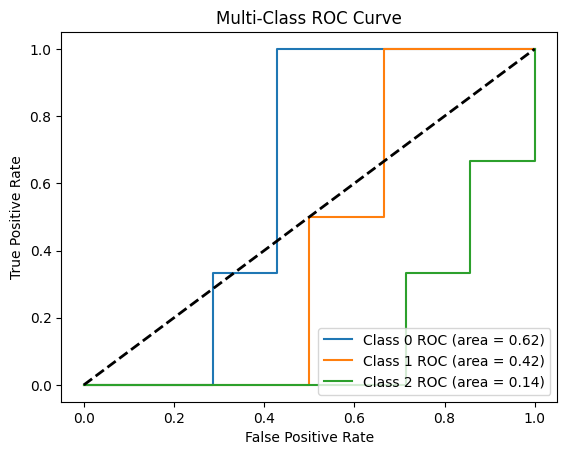

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy.special import softmax

# Functions for calculating metrics
def confusion_matrix(y_true, y_pred, classes):
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), int)
    for i, c1 in enumerate(classes):
        for j, c2 in enumerate(classes):
            cm[i, j] = np.sum((y_true == c1) & (y_pred == c2))
    return cm

def calculate_metrics(cm):
    precision = np.diag(cm) / np.sum(cm, axis=0, where=(np.sum(cm, axis=0) != 0))
    recall = np.diag(cm) / np.sum(cm, axis=1, where=(np.sum(cm, axis=1) != 0))
    f1 = 2 * (precision * recall) / (precision + recall + (precision + recall == 0))
    specificity = np.sum(cm, axis=1) - np.diag(cm) / (np.sum(cm) - np.sum(cm, axis=0))
    return precision, recall, f1, specificity

def aggregate_metrics(cm, average='macro'):
    precision, recall, f1, _ = calculate_metrics(cm)
    if average == 'macro':
        return precision.mean(), recall.mean(), f1.mean()
    elif average == 'micro':
        total_true_positives = np.sum(np.diag(cm))
        total_predicted = np.sum(cm, axis=0)
        total_actual = np.sum(cm, axis=1)
        micro_precision = total_true_positives / total_predicted.sum()
        micro_recall = total_true_positives / total_actual.sum()
        micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)
        return micro_precision, micro_recall, micro_f1
    elif average == 'weighted':
        weights = np.sum(cm, axis=1) / np.sum(cm)
        weighted_precision = np.average(precision, weights=weights)
        weighted_recall = np.average(recall, weights=weights)
        weighted_f1 = np.average(f1, weights=weights)
        return weighted_precision, weighted_recall, weighted_f1

# Evaluation function
def evaluate_all(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, classes)
    accuracy = np.trace(cm) / np.sum(cm)
    precision, recall, f1, specificity = calculate_metrics(cm)
    macro_precision, macro_recall, macro_f1 = aggregate_metrics(cm, 'macro')
    micro_precision, micro_recall, micro_f1 = aggregate_metrics(cm, 'micro')
    weighted_precision, weighted_recall, weighted_f1 = aggregate_metrics(cm, 'weighted')

    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.2f}")
    print("Precision per class:", precision)
    print("Recall per class:", recall)
    print("F1 Score per class:", f1)
    print("Specificity per class:", specificity)
    print(f"Macro Average: Precision: {macro_precision:.2f}, Recall: {macro_recall:.2f}, F1: {macro_f1:.2f}")
    print(f"Micro Average: Precision: {micro_precision:.2f}, Recall: {micro_recall:.2f}, F1: {micro_f1:.2f}")
    print(f"Weighted Average: Precision: {weighted_precision:.2f}, Recall: {weighted_recall:.2f}, F1: {weighted_f1:.2f}")

    return cm, precision, recall, f1, specificity

# Example Data
classes = np.array([0, 1, 2])  # Class labels
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2, 1])
y_pred = np.array([0, 1, 0, 0, 1, 1, 0, 1, 2, 2])
y_prob = softmax(np.random.rand(10, 3), axis=1)  # Random probabilities for example

# Evaluate metrics
cm, precision, recall, f1, specificity = evaluate_all(y_true, y_pred, classes)

# Plotting ROC Curves for Multi-Class
def plot_roc_curves(y_true, y_prob, classes):
    y_true = label_binarize(y_true, classes=classes)
    n_classes = y_true.shape[1]
    
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} ROC (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curves(y_true, y_prob, classes)


### Multi-label Classification

In [12]:
import numpy as np

def confusion_matrix(y_true, y_pred):
    """Constructs a confusion matrix for multi-label classification."""
    n_labels = y_true.shape[1]
    cm = np.zeros((n_labels, 2, 2), dtype=int)
    for i in range(n_labels):
        cm[i, 1, 1] = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 1))  # TP
        cm[i, 0, 0] = np.sum((y_true[:, i] == 0) & (y_pred[:, i] == 0))  # TN
        cm[i, 0, 1] = np.sum((y_true[:, i] == 0) & (y_pred[:, i] == 1))  # FP
        cm[i, 1, 0] = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 0))  # FN
    return cm

def calculate_accuracy(y_true, y_pred):
    """Calculates accuracy for multi-label classification."""
    correct_labels = np.equal(y_true, y_pred)
    accuracy = np.sum(correct_labels) / np.prod(correct_labels.shape)
    return accuracy

def calculate_metrics(cm):
    """Calculate precision, recall, F1 score and specificity for all labels."""
    TP = cm[:, 1, 1]
    TN = cm[:, 0, 0]
    FP = cm[:, 0, 1]
    FN = cm[:, 1, 0]

    precision = TP / (TP + FP + 1e-6)
    recall = TP / (TP + FN + 1e-6)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    specificity = TN / (TN + FP + 1e-6)
    return precision, recall, f1, specificity

def aggregate_metrics(y_true, y_pred):
    """Calculates macro, micro and weighted metrics."""
    cm = confusion_matrix(y_true, y_pred)
    precision, recall, f1, specificity = calculate_metrics(cm)

    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1)

    total_true = np.sum(cm[:, :, 1], axis=1)
    total_pred = np.sum(cm[:, :, 0], axis=1)
    micro_precision = np.sum(precision * total_true) / np.sum(total_true)
    micro_recall = np.sum(recall * total_pred) / np.sum(total_pred)
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall + 1e-6)

    weighted_precision = np.average(precision, weights=total_true)
    weighted_recall = np.average(recall, weights=total_pred)
    weighted_f1 = np.average(f1, weights=(total_true + total_pred) / 2)

    return macro_precision, macro_recall, macro_f1, micro_precision, micro_recall, micro_f1, weighted_precision, weighted_recall, weighted_f1

def evaluate_all(y_true, y_pred):
    """Evaluates all metrics and prints the results."""
    accuracy = calculate_accuracy(y_true, y_pred)
    macro_precision, macro_recall, macro_f1, micro_precision, micro_recall, micro_f1, weighted_precision, weighted_recall, weighted_f1 = aggregate_metrics(y_true, y_pred)
    
    print("Accuracy:", accuracy)
    print("Macro Average Precision:", macro_precision)
    print("Macro Average Recall:", macro_recall)
    print("Macro Average F1:", macro_f1)
    print("Micro Average Precision:", micro_precision)
    print("Micro Average Recall:", micro_recall)
    print("Micro Average F1:", micro_f1)
    print("Weighted Average Precision:", weighted_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Weighted Average F1:", weighted_f1)

# Example Data
y_true = np.array([[1, 1, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0]])
y_pred = np.array([[1, 0, 1], [0, 1, 1], [1, 0, 0], [0, 1, 0]])

evaluate_all(y_true, y_pred)


Accuracy: 0.8333333333333334
Macro Average Precision: 0.8333329166668749
Macro Average Recall: 0.8333329166668749
Macro Average F1: 0.8333324166672083
Micro Average Precision: 0.8333329166668749
Micro Average Recall: 0.8333329166668749
Micro Average F1: 0.833332416667175
Weighted Average Precision: 0.8333329166668749
Weighted Average Recall: 0.8333329166668749
Weighted Average F1: 0.8333324166672083


In [13]:
import numpy as np

def hamming_loss(y_true, y_pred):
    """Calculate the Hamming loss which is the fraction of wrong labels to the total number of labels."""
    return np.mean(np.not_equal(y_true, y_pred).astype(int))

def subset_accuracy(y_true, y_pred):
    """Calculate the subset accuracy, the strictest metric, indicating the percentage of samples that have all their labels classified correctly."""
    return np.mean(np.all(y_true == y_pred, axis=1))

# Example Usage
y_true = np.array([[1, 0, 1], [0, 1, 0]])
y_pred = np.array([[1, 1, 1], [1, 0, 0]])
print("Hamming Loss:", hamming_loss(y_true, y_pred))
print("Subset Accuracy:", subset_accuracy(y_true, y_pred))

Hamming Loss: 0.5
Subset Accuracy: 0.0


In [14]:
import numpy as np

def calculate_coverage_error(y_true, y_score):
    """ Manually calculate the coverage error without using scikit-learn. """
    n_samples = y_true.shape[0]
    coverage_error = 0.0
    for i in range(n_samples):
        # Get ranks of the scores, highest (best) score has rank 1
        ranks = np.argsort(np.argsort(-y_score[i])) + 1
        # Get the maximum rank among the true labels
        max_rank = np.max(ranks[y_true[i] == 1])
        coverage_error += max_rank
    coverage_error /= n_samples
    return coverage_error

def calculate_ranking_loss(y_true, y_score):
    """ Manually calculate the ranking loss without using scikit-learn. """
    n_samples = y_true.shape[0]
    ranking_loss = 0.0
    for i in range(n_samples):
        # Create all possible pairs of indices for true (positive) and false (negative) labels
        positive_indices = np.where(y_true[i] == 1)[0]
        negative_indices = np.where(y_true[i] == 0)[0]
        # Count the number of incorrectly ordered pairs
        incorrect_pairs = 0
        for pos_idx in positive_indices:
            for neg_idx in negative_indices:
                if y_score[i][pos_idx] <= y_score[i][neg_idx]:
                    incorrect_pairs += 1
        # Normalize by the total number of pairs
        total_pairs = len(positive_indices) * len(negative_indices)
        if total_pairs > 0:
            ranking_loss += incorrect_pairs / total_pairs
    ranking_loss /= n_samples
    return ranking_loss

# Example usage
y_true = np.array([[1, 0, 1], [0, 1, 0]])
y_score = np.array([[0.8, 0.2, 0.9], [0.1, 0.6, 0.2]])

coverage_err = calculate_coverage_error(y_true, y_score)
ranking_loss_val = calculate_ranking_loss(y_true, y_score)

print("Coverage Error:", coverage_err)
print("Ranking Loss:", ranking_loss_val)

Coverage Error: 1.5
Ranking Loss: 0.0
